1. Download the dataset, unzip and explore the file folders. Load the image dataset
    with training and testing grouped. (Note, cv2 reads and saves in BGR channel order)

(([], []), ([], []))

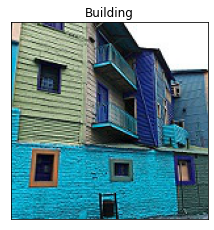

In [1]:
import cv2, os, matplotlib.pyplot as plt, numpy as np
from random import randint
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
X_tr, y_tr, X_ts, y_ts = [], [], [], []
for label in CNAMES:
    path = '/Users/samlasker/Documents/Applied Machine Learning/seg_train/seg_train/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_tr += [CNAMES.index(label)]         

m='seg_train/seg_train/buildings/4.jpg'
plt.figure(1, figsize = (12 , 12))
plt.subplot(2 , 3 , 1)
plt.imshow(cv2.imread(m))
plt.title('Building')
plt.xticks([]) , plt.yticks([])

In [2]:
#2.Convert the imageset to numpy array, such as the array size:
#(14034, 128, 128, 3)
#Scale the imageset to [0-1].

Images, Labels = X_tr, y_tr
Images = np.array(Images) #convert the imageset to numpy array
Labels = np.array(Labels)

print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 128, 128, 3)
Shape of Labels: (14034,)


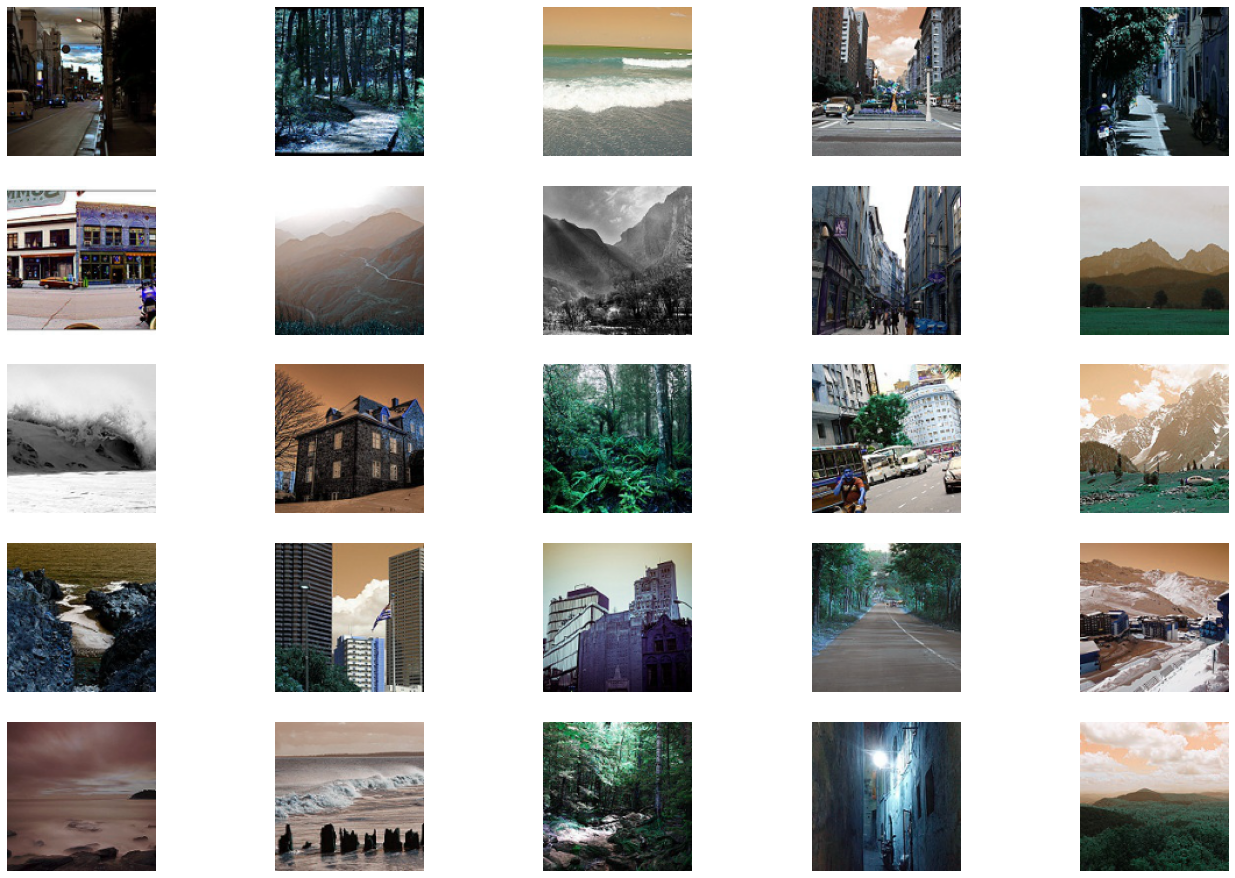

In [3]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        #ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')


In [4]:
import tensorflow as tf
#3.Create a convolutional neural network to train and report its performance on the
#testing portion of the dataset. 95% reclassification and 75% testing performance should be
#achievable without any hyperparameter tuning. 
tf.keras.backend.clear_session()

#CNN neural network
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))

tf.random.set_seed(0)

cnn1.build(input_shape=(None, 128, 128, 3))

cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 7

2022-05-07 16:43:29.141755: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#%%time
#history = cnn1.fit(Images, Labels,
 #       epochs=NUM_EPOCHS,
 #       shuffle=True)

Epoch 1/7
439/439 [==============================] - 150s 342ms/step - loss: 20.3879 - accuracy: 0.2122

Epoch 2/7
439/439 [==============================] - 226s 514ms/step - loss: 1.7854 - accuracy: 0.1861

Epoch 3/7
439/439 [==============================] - 174s 396ms/step - loss: 1.7682 - accuracy: 0.2132

Epoch 4/7
439/439 [==============================] - 177s 402ms/step - loss: 1.7129 - accuracy: 0.2486

Epoch 5/7
439/439 [==============================] - 167s 381ms/step - loss: 1.6053 - accuracy: 0.3055

Epoch 6/7
439/439 [==============================] - 151s 343ms/step - loss: 1.3088 - accuracy: 0.4488

Epoch 7/7
439/439 [==============================] - 152s 346ms/step - loss: 1.0618 - accuracy: 0.5488

CPU times: user 1h 33min 9s, sys: 20min 41s, total: 1h 53min 50s
Wall time: 19min 56s

In [6]:
#y_pred = np.argmax(cnn1.predict(Images), axis=1)

#print(f'Accuracy= {sum(y_pred==Labels)/len(Images):.3f}')

Accuracy= 0.605

In [7]:
#4. Add regularization and/or drop-out features to your CNN. Report your model's best
#performance.
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,Dropout,MaxPool2D,Flatten,Activation,BatchNormalization

# Optimized CNN neural network
#ADDING layers
cnn2 = tf.keras.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5),
    name='conv_3', activation='relu'))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_3'))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=512, name='fc_1', activation='relu'))
#ADDING DROPOUT
cnn2.add(Dropout(0.5))
cnn2.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

tf.random.set_seed(0)
cnn2.build(input_shape=(None, 128, 128, 3))
cnn2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 7

In [8]:
#%%time
#history = cnn2.fit(Images, Labels,
#        epochs=NUM_EPOCHS,
#        shuffle=True)

Epoch 1/7
439/439 [==============================] - 109s 248ms/step - loss: 2.4653 - accuracy: 0.4432

Epoch 2/7
439/439 [==============================] - 110s 250ms/step - loss: 1.1449 - accuracy: 0.5253

Epoch 3/7
439/439 [==============================] - 110s 251ms/step - loss: 1.0647 - accuracy: 0.5640

Epoch 4/7
439/439 [==============================] - 112s 255ms/step - loss: 1.0075 - accuracy: 0.5956

Epoch 5/7
439/439 [==============================] - 109s 249ms/step - loss: 0.9230 - accuracy: 0.6248

Epoch 6/7
439/439 [==============================] - 109s 248ms/step - loss: 0.8885 - accuracy: 0.6425

Epoch 7/7
439/439 [==============================] - 110s 250ms/step - loss: 0.8881 - accuracy: 0.6460

CPU times: user 1h 5min 29s, sys: 6min 42s, total: 1h 12min 12s
Wall time: 12min 48s

In [9]:
#y_pred = np.argmax(cnn2.predict(Images), axis=1)

#print(f'Accuracy= {sum(y_pred==Labels)/len(Images):.3f}')

Accuracy= 0.658
